# We construct a HMM to learn the velocity settings as hidden states

We also use the improbable transition counter for thresholding

In [32]:
import numpy as np
import pickle 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
v_vec = np.array(trajs['v_vec'])
# remove the mean component from y_vec 
y_mean = np.array(trajs['y_mean'])
del trajs
trajectory_file.close()
del trajectory_file

<ipython-input-32-3f3f551b326a>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_vec = np.array(trajs['v_vec'])


In [33]:
for i,v in enumerate(v_vec):
    v_vec[i] = np.array(v[0:100])
v_vec = np.stack(v_vec, axis=0)

Plotting some velocity graph, we shall construct a HMM to learn this shit

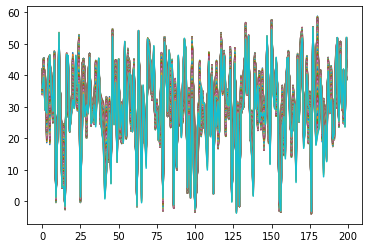

In [36]:
from matplotlib import pyplot as plt
plt.plot(v_vec)